# Handwritten Digit Classifier using MNIST Dataset

## # Handwritten Digit Classifier using MNIST Dataset

## 1. Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

## 2. Load and Preprocess the MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

## 3. Build the Neural Network Model

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 4. Compile the Model

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 5. Train the Model

In [5]:
history = model.fit(x_train, y_train_cat, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8723 - loss: 0.4389 - val_accuracy: 0.9652 - val_loss: 0.1173
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9659 - loss: 0.1102 - val_accuracy: 0.9770 - val_loss: 0.0816
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9783 - loss: 0.0688 - val_accuracy: 0.9747 - val_loss: 0.0880
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9835 - loss: 0.0510 - val_accuracy: 0.9763 - val_loss: 0.0850
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9880 - loss: 0.0359 - val_accuracy: 0.9765 - val_loss: 0.0829


## 6. Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9747 - loss: 0.0919
Test Accuracy: 0.9792


## 7. Display Predictions on Sample Test Images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


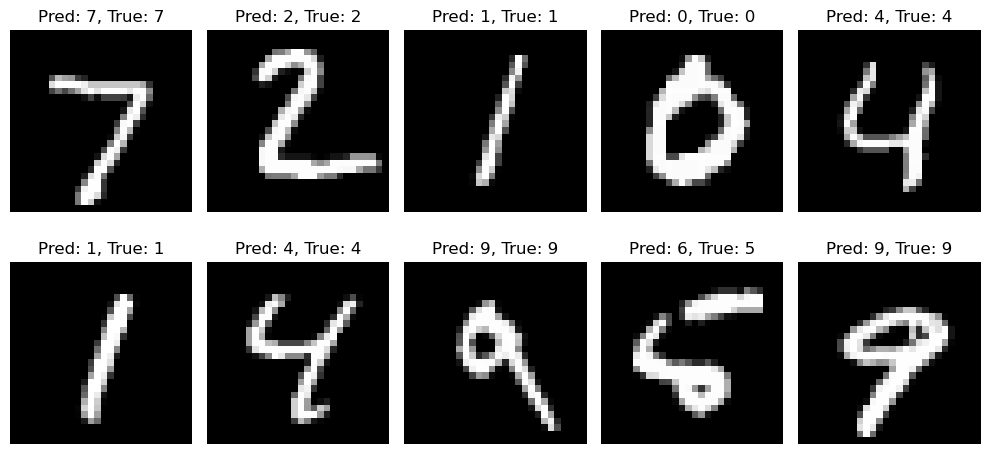

In [7]:
predictions = model.predict(x_test)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f"Pred: {pred_label}, True: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()